In [2]:
import pandas as pd

test = pd.read_csv("data/test.csv")
train = pd.read_csv("data/train.csv")

print("Dimensions of train: {}".format(train.shape))
print("Dimensions of test: {}".format(test.shape))

Dimensions of train: (891, 12)
Dimensions of test: (418, 11)


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

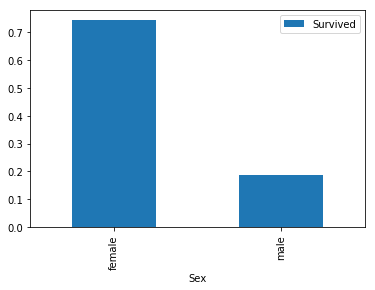

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

In [6]:
sex_pivot

,Survived
Sex,
female,0.742038
male,0.188908


In [7]:
erkek_yasayan = train[(train.Sex == 'male') & (train.Survived == 0)]

In [8]:
len(erkek_yasayan)

468

In [9]:
1 - (468 / 577)

0.18890814558058922

In [10]:
train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100

74.20382165605095

In [11]:
type(train["Survived"])

pandas.core.series.Series

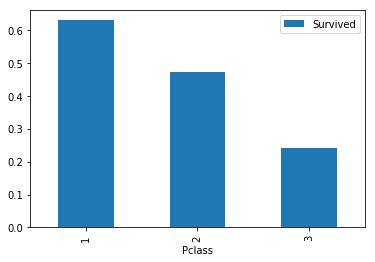

In [12]:
class_pivot = train.pivot_table(index="Pclass",values="Survived")
class_pivot.plot.bar()


In [13]:
class_pivot

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [17]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [18]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
train.shape

(891, 12)

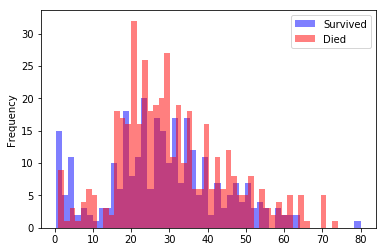

In [23]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
died["Age"].plot.hist(alpha=0.5,color='red',bins=50)
plt.legend(['Survived','Died'])
plt.show()

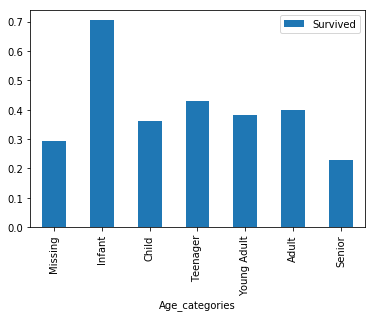

In [24]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

pivot = train.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()

In [25]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ["Pclass","Sex","Age_categories"]:
    train = create_dummies(train,column)
    test = create_dummies(test,column)

In [26]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,330877,8.4583,...,1,0,1,1,0,0,0,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,0,0,1,0,0,0,0,0,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,1,0,1,0,1,0,0,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,1,1,0,0,0,0,0,1,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,0,1,0,0,0,0,1,0,0,0


In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [29]:
columns = ['Pclass_2', 'Pclass_3', 'Sex_male']
lr.fit(train[columns], train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

lr = LogisticRegression()
lr.fit(train[columns], train["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
holdout = test # from now on we will refer to this
               # dataframe as the holdout data

from sklearn.model_selection import train_test_split

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.20,random_state=0)

In [32]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [33]:
predictions

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [35]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)

In [36]:
accuracy

0.8100558659217877

In [37]:
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)

print(accuracy)

0.8100558659217877


In [38]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.76404494 0.76404494 0.7752809  0.78651685 0.8        0.80681818
 0.80898876 0.81111111 0.83146067 0.87640449]
0.8024670865963002


In [39]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(train_X, train_y)
y_pred = gaussian.predict(test_X)
acc_gaussian = round(accuracy_score(y_pred, test_y) * 100, 2)
print(acc_gaussian)

78.21


In [40]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(train_X, train_y)
y_pred = svc.predict(test_X)
acc_svc = round(accuracy_score(y_pred, test_y) * 100, 2)
print(acc_svc)

78.77


In [41]:
from sklearn.model_selection import cross_val_score

svc = SVC()
scores = cross_val_score(svc, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.74157303 0.76136364 0.76404494 0.7752809  0.7752809  0.8
 0.80898876 0.80898876 0.81111111 0.84269663]
0.7889328680059017


In [42]:
###

In [44]:
import numpy as np
veri = np.array([2,4,2,4,3,4,3,2,4,2,4,3,323])

In [45]:
veri

array([  2,   4,   2,   4,   3,   4,   3,   2,   4,   2,   4,   3, 323])

In [60]:
m, s = veri.mean(), veri.std()
m,s

(27.692307692307693, 85.25201068270347)

In [67]:

x = 300
np.abs(x-m) > 3 * s

True

In [72]:
anomalyDetector(veri, x = -2700 )

True

In [68]:
def anomalyDetector(veri, x):
    m, s = veri.mean(), veri.std()
    return np.abs(x-m) > 3 * s

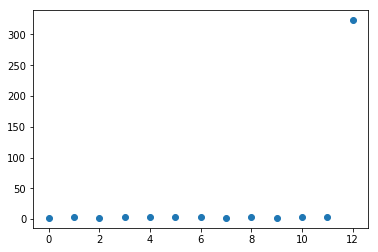

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(range(len(veri)), veri)